# Teoría de los Circuitos 2        <img src="./logo_UTN.svg" align="right" width="150" />
# Curso: R4001    Año: 2024
## Tarea Semanal 1

#### Fabian Villada

In [1]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import TransferFunction

fig_sz_x = 8
fig_sz_y = 6
fig_dpi = 150 # dpi

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi

plt.figure(1)
plt.plot(np.random.rand(10))
plt.close(1)

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

# Ahora importamos las funciones de PyTC2
from pytc2.general import simplify_n_monic
from pytc2.sistemas_lineales import  parametrize_sos
from pytc2.general import print_subtitle

### Transferencia Circuital

In [ ]:
Metodo sistematico de nodos

![transf](2.jpeg)

In [2]:
# variables simbólicas
s = sp.symbols('s', complex=True)
Vi, V1, V2, Vx, Vo = sp.symbols("Vi, V1, V2, Vx, Vo")
G1, G2, G3, G4, G5, G6, C1, C2, As, wt = sp.symbols("G1, G2, G3, G4, G5, G6, C1, C2, As, wt")

# Sistemas de ecuaciones del modelo ideal, negativamente realimentado
aa = sp.solve([ 
                Vx*(G5+G6) - V2*G6 - Vi*G5,    #define las ecuaciones
                Vx * (G4+G3) - V1*G4 - Vo*G3,
                V1*G1 + V2*s*C1,
                V2*G2 + Vo*s*C2,
                ], 
                [Vo, Vi, V1, V2, Vx])          #define las incognitas

T1 = aa[Vo]/aa[Vi]   #Calcula la transferencia T1 dividiendo la solución de Vo (salida) entre la solución de Vi (entrada).

num, den = sp.fraction(sp.simplify(sp.expand(T1)))   #Utiliza las funciones fraction, simplify y expand de sympy para obtener el numerador y el denominador de T1 de manera simplificada.

num = sp.Poly(num,s) #Crea un objeto Poly de sympy para el numerador utilizando la función Poly. 
                     #Esto permite realizar operaciones algebraicas con el numerador.
den = sp.Poly(den,s)

num1, den1, w_on, Q_n, w_od, Q_d, k1 = parametrize_sos(num, den)

print_subtitle('Transferencia obtenida')

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(k1,num1/den1, evaluate=False)) ))

print_subtitle('Parámetros')

display(Math( r' k = ' + sp.latex(k1) ))

display(Math( r' \omega_0 = ' + sp.latex(w_od) ))

display(Math( r' Q = ' + sp.latex(Q_d) ))

#### Transferencia obtenida

<IPython.core.display.Math object>

#### Parámetros

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
T1

(G1*G2*G3 + G1*G2*G4)*(C1*C2*G4*G5*s**2 + G1*G2*G3*G5)/((C1*C2*G4*s**2 + G1*G2*G3)*(C1*C2*G4*G5*s**2 + C1*C2*G4*G6*s**2 + C2*G1*G3*G6*s + C2*G1*G4*G6*s + G1*G2*G3*G5 + G1*G2*G3*G6))

<div class="alert alert-block alert-info">
<b>1)</b> Determinar el orden del filtro y $ \varepsilon $
</div>

Calculamos el orden del filtro a diseñar segun los requerimientos
El procedimiento a utilizar es el de iteraciones

<b>Trabajamos sobre plantilla de Diseño NORMALIZADA</b>

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle #aca ya crea instancias s y w de sympy
import sympy as sp
from IPython.display import display, Math, Markdown

#LA PLANTILLA NORMALIZADA
alfa_max = 0.4 # dB 
alfa_min = 48 # dB
ws = 3

# epsilon cuadrado
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)

print("eps = " , eps)

for nn in range(2,7):
    
    alfa_min_c = 10*np.log10(1 + eps_sq * np.cosh(nn * np.arccosh(ws))**2 )
    # print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

    alfa_min_b = 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )

eps =  0.3106093948083108
nn 2 - alfa_min_butter 9.452092 - alfa_min_cheby 14.606303
nn 3 - alfa_min_butter 18.532881 - alfa_min_cheby 29.761586
nn 4 - alfa_min_butter 28.020848 - alfa_min_cheby 45.067943
nn 5 - alfa_min_butter 37.557179 - alfa_min_cheby 60.378833
nn 6 - alfa_min_butter 47.098927 - alfa_min_cheby 75.689856


<b>Analizando la iteracion concluimos que el orden del Filtro que cumple $\alpha _{max }\geq 48$ es nn = 5</b>

In [4]:
nn = 5

### Establecido el orden del filtro a sintetizar procedemos al analisis simbolico

In [5]:
#calculo los coeficente Cn de cheby
chebn_expr = Chebyshev_polynomials(nn)
display(sp.expand(chebn_expr)) #visualizacion en latex

#Conformo la funcion de transferencia al cuadrado en jw
Tcsq_jw = 1 / (1 + eps_sq * chebn_expr**2) #transferencia cheby square (al cuadrado)
display(Math( r' \left \| T_{c}{(\omega )} \right \|^{2} = ' + sp.latex(sp.expand(Tcsq_jw)) ))

#remplazo w=s/j
j = sp.I   # asignacion de j como la unidad imaginaria de sympy
Tcsq_s = Tcsq_jw.subs(w, s/j) 
display(Math( r' \left \| T_{c}{(s)} \right \|^{2} = ' + sp.latex(sp.expand(Tcsq_s)) ))

16*w**5 - 20*w**3 + 5*w

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Analisis Numerico <b>el vector de signo a construir es de 11 elementos </b>

In [7]:
# Construir array de coeficientes denominador del polinomio de  chebychev (Tcsq_den_s )
Cn3 = np.array([16., 0.,-20., 0., 5., 0.])  #construido a partir de los cn 4w³-3w
Cn3sq = np.polymul( Cn3, Cn3)
Tcsq_den_jw = np.polyadd( np.array([1.]), Cn3sq * eps_sq ) 

# convierto a s
Tcsq_den_s = Tcsq_den_jw * np.array([-1,-1,1,1,-1,-1,1,1,-1,-1,1]) # pasar a s es aplicar la ley de signos esta representada hasta j¹⁰
print("COEFICIENTES DENOMINADOR POLINOMIO EN s ")
print(Tcsq_den_s) #polinomio cuyos coificientes son los de sp.expand(Tcsq_s) del analisis simbolico

print ("\n" *2)

roots_Tcsq_den_s = np.roots(Tcsq_den_s) #hallando las raices de este array de coeficientes obtengo los polos
print("polos: " ,roots_Tcsq_den_s)

print("\n" * 2)

# filtro T(s) reteniendo solo polos en el semi plano izquierdo
roots_Tcsq_den_s = roots_Tcsq_den_s[np.real(roots_Tcsq_den_s) < 0]
print("Polos SPI: ",roots_Tcsq_den_s)

COEFICIENTES DENOMINADOR POLINOMIO EN s 
[-24.69841821  -0.         -61.74604553   0.         -54.02778984
  -0.         -19.29563923   0.          -2.4119549   -0.
   1.        ]



polos:  [ 0.11932228+1.01949544j  0.11932228-1.01949544j -0.11932228+1.01949544j
 -0.11932228-1.01949544j  0.31238979+0.63008283j  0.31238979-0.63008283j
 -0.31238979+0.63008283j -0.31238979-0.63008283j -0.38613502+0.j
  0.38613502+0.j        ]



Polos SPI:  [-0.11932228+1.01949544j -0.11932228-1.01949544j -0.31238979+0.63008283j
 -0.31238979-0.63008283j -0.38613502+0.j        ]


### Comprobacion con funcion de scipy sig.cheb1ap()

In [14]:
z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

print("CEROS de la funcion de trans con aprox chebychev")
print("z=",z)
print("\n")

print("POLOS de la funcion de trans con aprox chebychev")
print("p=",p)
print("\n")

print("ganacia K")
print("k=",k)

CEROS de la funcion de trans con aprox chebychev
z= []


POLOS de la funcion de trans con aprox chebychev
p= [-0.11932228+1.01949544j -0.31238979+0.63008283j -0.38613502-0.j
 -0.31238979-0.63008283j -0.11932228-1.01949544j]


ganacia K
k= 0.20121735222648754


In [ ]:
Verificamos que los calculos hechos sin usar la funcion scipy (polos) coinciden con lo que me da sig.cheb1ap

### Expresion de orden 5 como cascadeo de dos orden y un orden 1

#### cheby 5 _ord_5_rip_0.4_att_48

<IPython.core.display.Math object>

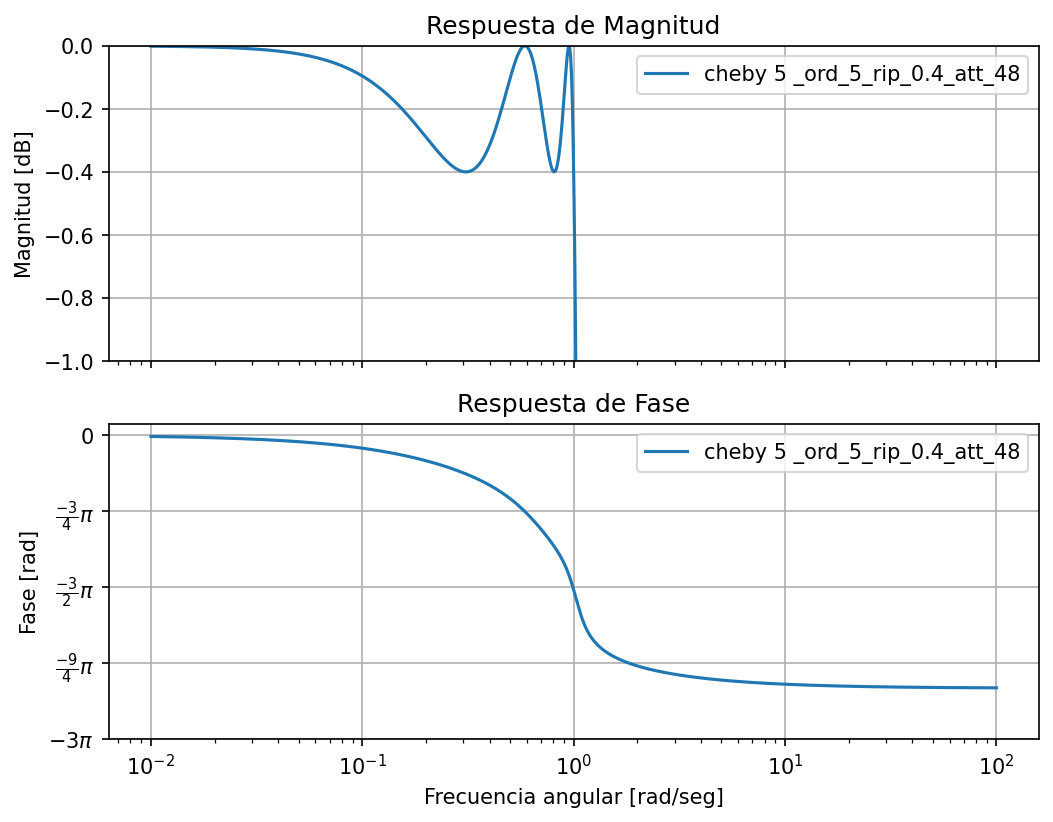

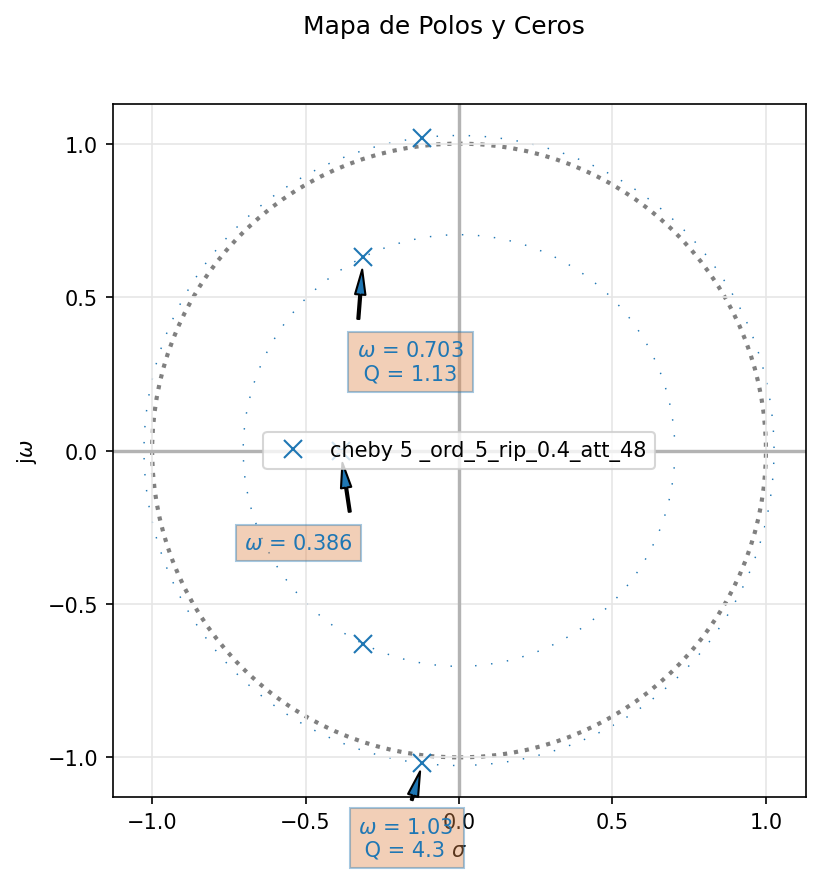

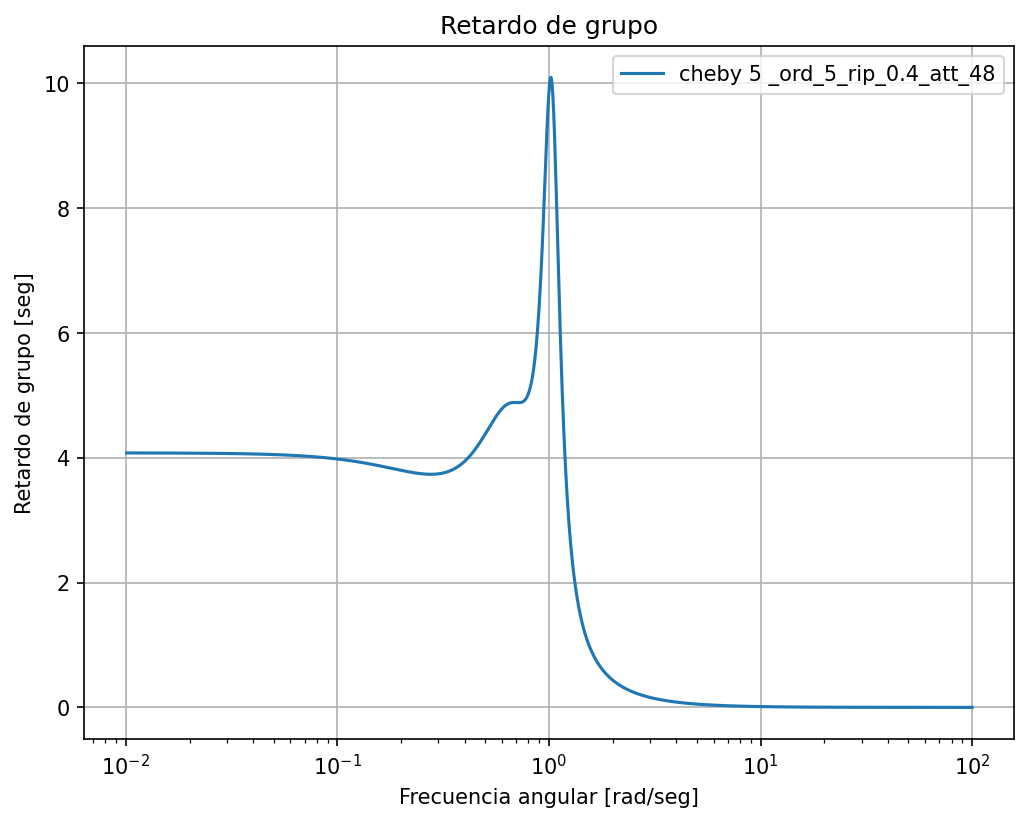

In [17]:
this_aprox = []
filter_names = []

this_aprox = "cheby 5 "
this_label = this_aprox + '_ord_' + str(nn) + '_rip_' + str(alfa_max) + '_att_' + str(alfa_min)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

filter_names.append(this_label)
my_tf = sig.TransferFunction(num_cheb, den_cheb)

resultados = analyze_sys(my_tf, this_label)

# Obtén el primer objeto Axes del primer elemento de la lista
primer_objeto_axes = resultados[0][1][0]

# Establece los límites del eje y en (-1, 0)
primer_objeto_axes.set_ylim(-1, 0)

print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')


### Sintesis circuital

![sintesis](sintesis.jpeg)

### Simulacion en LTspice

![simulacion valores normalizados](Simulacion_Spice.png)

### Desnormalizacion

In [8]:
import numpy as np

# Valores de entrada
cn = np.array([1.6, 1.263, 4.192,0.226, 2.59])
omegaw = np.pi * 300
omegaZ = 1000
Rn = np.array([1])

# Operación C = cn / (omegaw * omegaZ)
C = cn / (omegaw * omegaZ)

# Operación R = Rn * omegaZ
R = Rn * omegaZ

# Imprimir los resultados
print("C =", C)
print("R =", R)

C = [1.69765273e-06 1.34008462e-06 4.44785014e-06 2.39793448e-07
 2.74807535e-06]
R = [1000]


### Simulacion Desnormalizacion 300hz y escala de impedancia 1K

![desnormalizacion](1.png)

In [ ]:
No estoy llegando a valores correctos de ws y wp. Entrego para no extender plazos y continuo revisando